GitHub: https://github.com/eeryczeek/data_mining/tree/main/assignment_3

# TASK 1
Create a DVC repository for your project.


In [60]:
"""
%%bash
git init
dvc init
"""

'\n%%bash\ngit init\ndvc init\n'

# TASK 2
2. Get familiar with the kaggle competition Tabular Playground Series - Jul 2022

# TASK 3
3. Load the data into the repository. After each of the next steps, update your
repository.


In [61]:
alraedy_done = True

# TASK 4
4. As you have probably noticed, the data for this competition is obscure. We have 28 features, some of which are continuous and some are categorical. There is no additional information on the data - where does it come from, dwhat does it stand for? Propose a set of normalization schemas.

<Axes: >

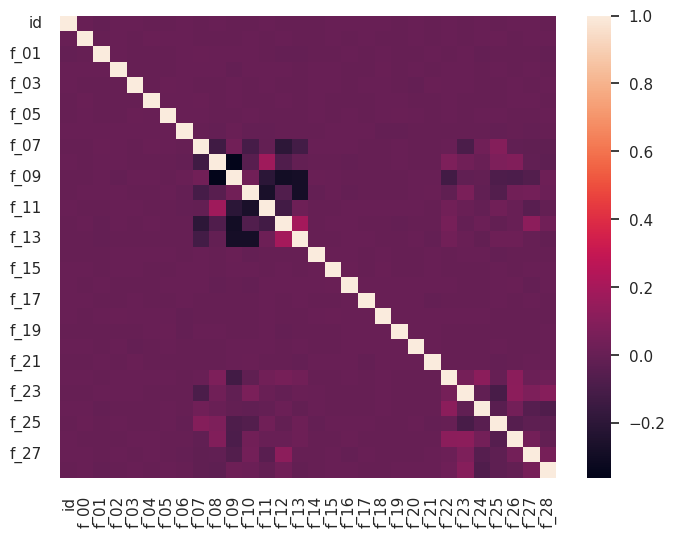

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer

tabular_playground_series = pd.read_csv('data.csv')
tabular_playground_series.describe()

sns.set(rc={'figure.figsize':(8, 6)})
sns.heatmap(tabular_playground_series.corr())

<Axes: >

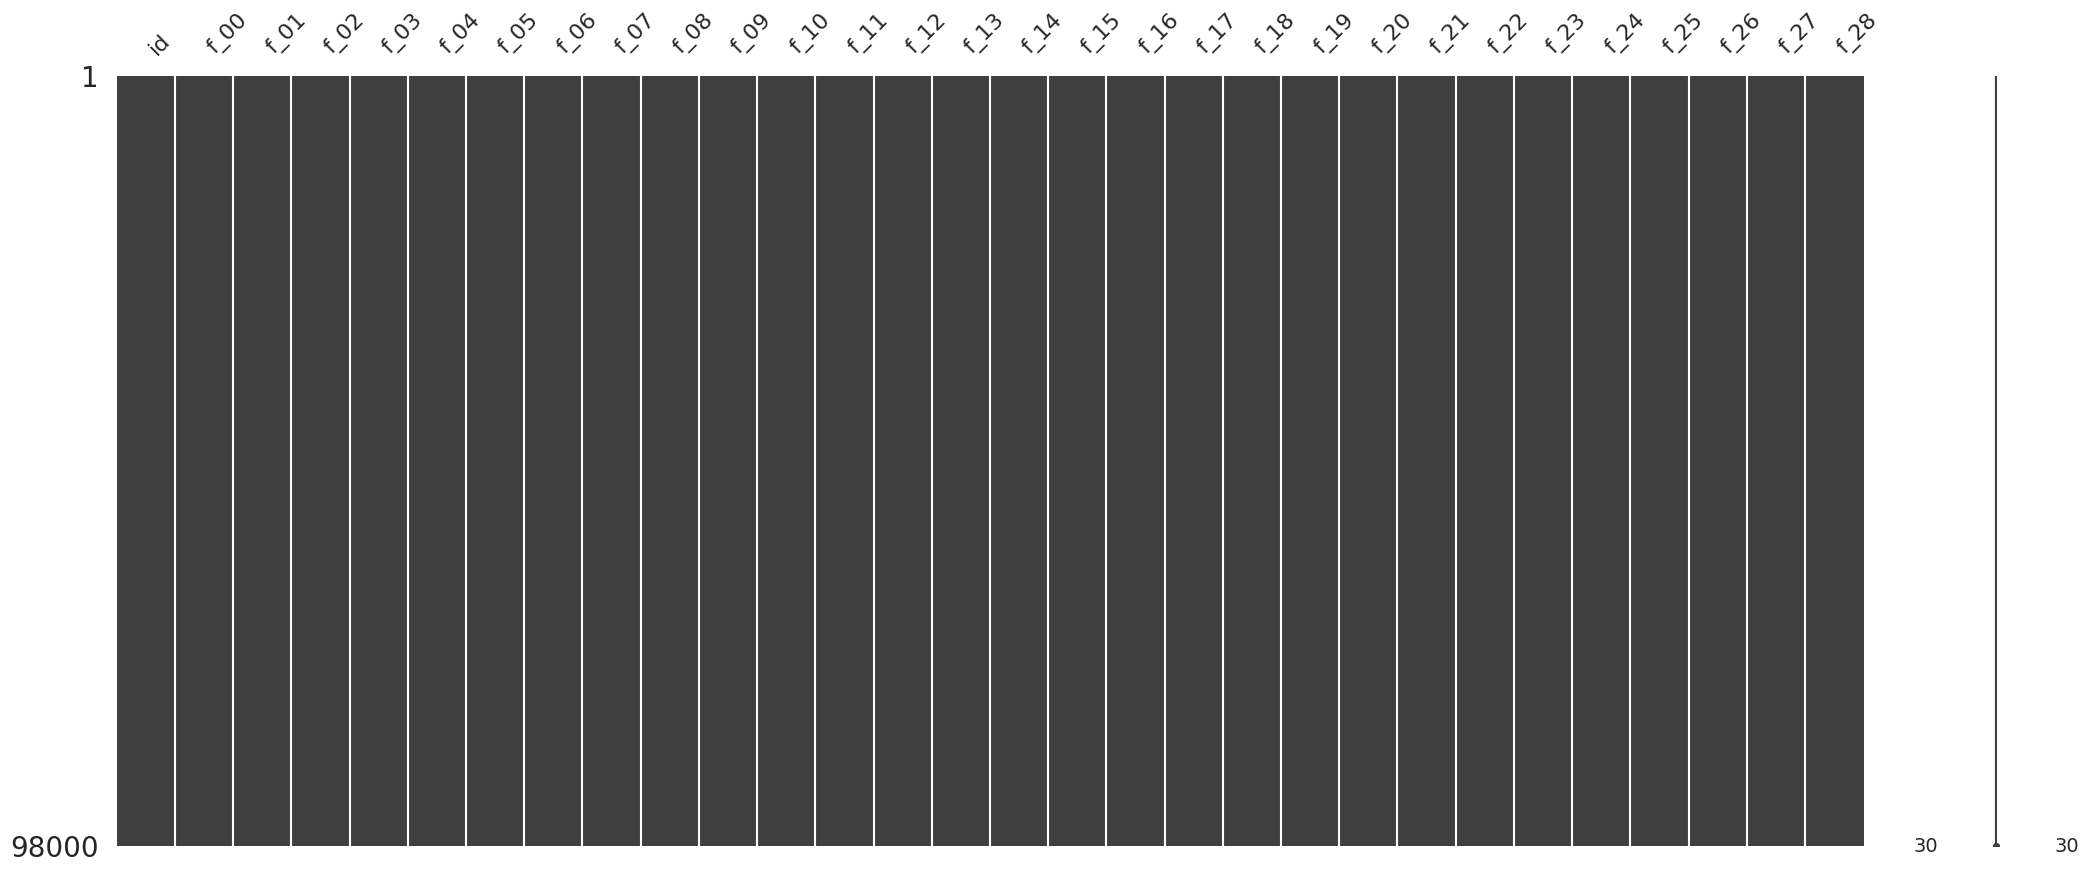

In [63]:
import missingno as msno

msno.matrix(tabular_playground_series)

In [64]:
# find out which features are discrete and which are continuous
discrete_features = tabular_playground_series.dtypes[tabular_playground_series.dtypes == 'int64'].index.drop('id')
print(discrete_features)

continuous_features = tabular_playground_series.dtypes[tabular_playground_series.dtypes == 'float64'].index
print(continuous_features)

Index(['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13'], dtype='object')
Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15',
       'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24',
       'f_25', 'f_26', 'f_27', 'f_28'],
      dtype='object')


In [65]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()
tabular_playground_series[continuous_features] = scaler.fit_transform(tabular_playground_series[continuous_features])
tabular_playground_series.drop("id", axis=1, inplace = True)

array([[<Axes: title={'center': 'f_00'}>,
        <Axes: title={'center': 'f_01'}>,
        <Axes: title={'center': 'f_02'}>,
        <Axes: title={'center': 'f_03'}>,
        <Axes: title={'center': 'f_04'}>],
       [<Axes: title={'center': 'f_05'}>,
        <Axes: title={'center': 'f_06'}>,
        <Axes: title={'center': 'f_07'}>,
        <Axes: title={'center': 'f_08'}>,
        <Axes: title={'center': 'f_09'}>],
       [<Axes: title={'center': 'f_10'}>,
        <Axes: title={'center': 'f_11'}>,
        <Axes: title={'center': 'f_12'}>,
        <Axes: title={'center': 'f_13'}>,
        <Axes: title={'center': 'f_14'}>],
       [<Axes: title={'center': 'f_15'}>,
        <Axes: title={'center': 'f_16'}>,
        <Axes: title={'center': 'f_17'}>,
        <Axes: title={'center': 'f_18'}>,
        <Axes: title={'center': 'f_19'}>],
       [<Axes: title={'center': 'f_20'}>,
        <Axes: title={'center': 'f_21'}>,
        <Axes: title={'center': 'f_22'}>,
        <Axes: title={'center'

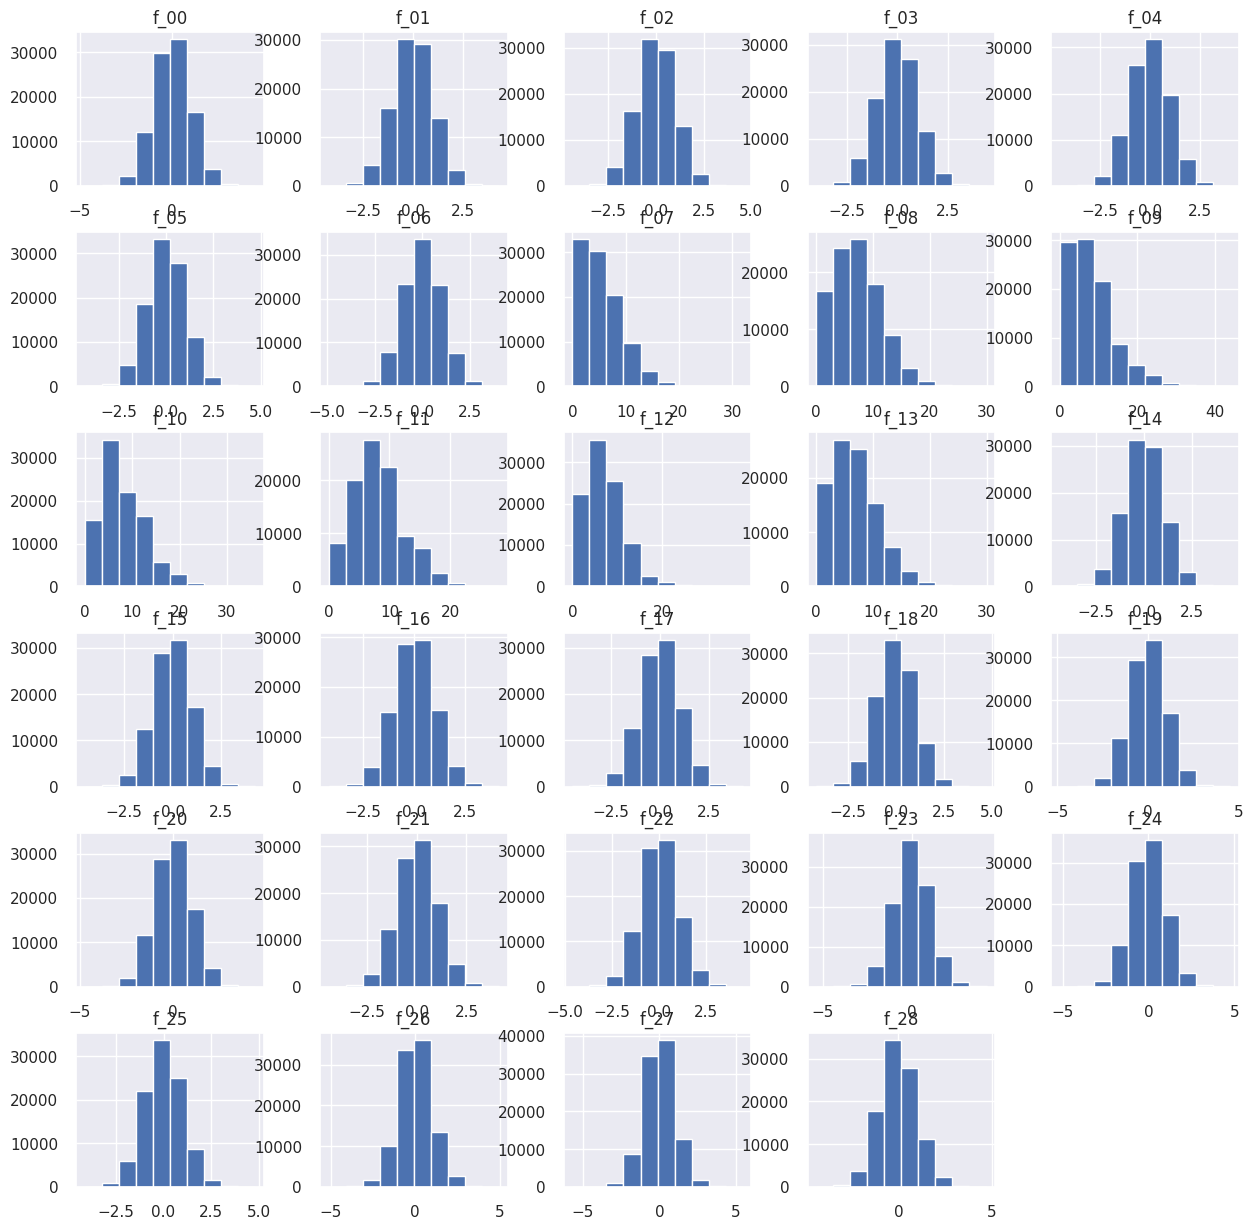

In [66]:
tabular_playground_series.hist(figsize = (15,15))

# TASK 5
5. Use DB-index and Silhouette coefficient in order to propose a set of numbers of clusters.

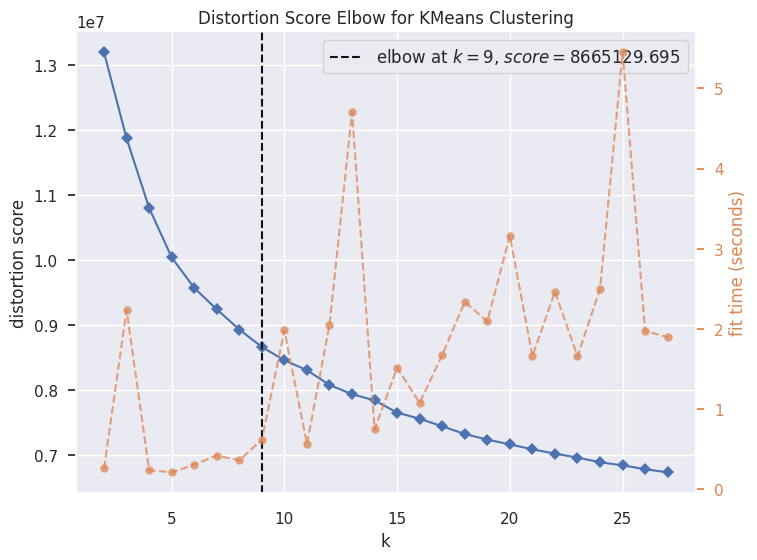

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_init = "auto")
visualizer = KElbowVisualizer(model, k=(2, 28), timings=True)
visualizer.fit(tabular_playground_series)
visualizer.show()

<Axes: xlabel='n_clusters'>

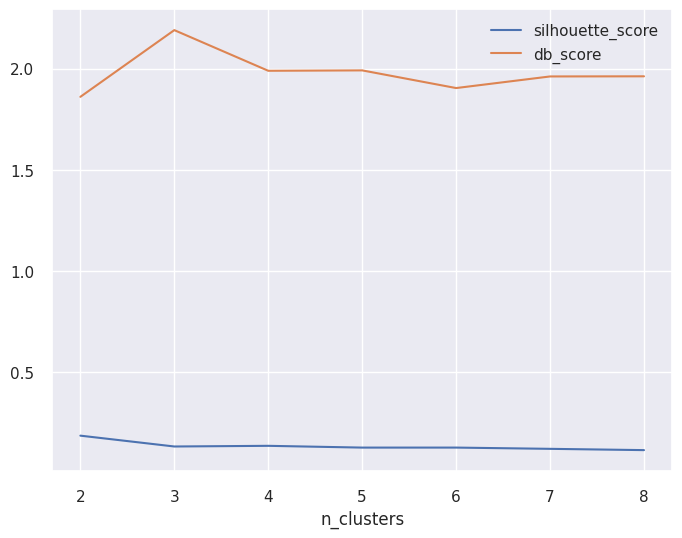

In [68]:
# use db-index and silhouette coefficient to find the best number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

def find_best_number_of_clusters(df, elbow):
    scores = []
    for i in range(2, elbow+3):
        kmeans = KMeans(n_init='auto', n_clusters=i, max_iter=3000).fit(df)
        labels = kmeans.labels_
        scores.append([i, silhouette_score(df, labels, metric='euclidean'), davies_bouldin_score(df, labels)])
    return scores

scores = find_best_number_of_clusters(tabular_playground_series, 6)
scores = pd.DataFrame(scores, columns=['n_clusters', 'silhouette_score', 'db_score'])
scores.plot(x='n_clusters', y=['silhouette_score', 'db_score'])

We will choose n_clusters = 7 (but will later check the results also for 6 and 8 just to be sure)

# TASK 6 & 7
6. Perform clustering with k-means and DBSCAN. You should end up with at least 16 different models.
7. Use feature selection methods in order to prepare visualizations of your clustering methods. For each model calculate the similarities between clusters - visualize the similarities with a heatmap (use several definitions of cluster similarity). Compile the data as a table.


In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [70]:
tabular_playground_series.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389551,-0.917695,0.649105,0.589499,-0.824775,0.734849,2.267432,2,13,14,...,-0.471839,-0.754257,-0.762195,-0.711585,0.911572,-0.680948,0.762783,0.960482,1.045296,0.683323
1,-0.688544,-0.459195,0.654321,0.995533,-1.644472,0.864967,-0.087835,2,3,6,...,-0.422434,-0.089129,-1.783073,-0.541815,0.454693,1.032386,-0.133948,-0.552942,0.355435,-1.602671
2,0.805607,0.318753,-1.167963,-0.623531,0.108638,0.785146,1.996476,5,11,5,...,-0.407243,-1.597140,1.193015,2.236943,0.088090,-1.513324,-0.577814,0.979171,-0.926250,-2.224327
3,-0.500743,0.223305,0.264788,0.232124,0.417259,-1.219016,0.142257,6,2,13,...,0.621083,1.284518,0.534669,0.727667,-1.218753,0.825698,-1.164842,-0.397908,-0.114228,0.307002
4,-0.670613,-1.044343,-0.268745,-1.828801,-0.285713,-1.850223,0.786963,8,7,5,...,-1.617255,-0.433152,0.324273,0.218614,-1.484025,0.847369,-0.622034,1.166086,-0.385886,-1.149094


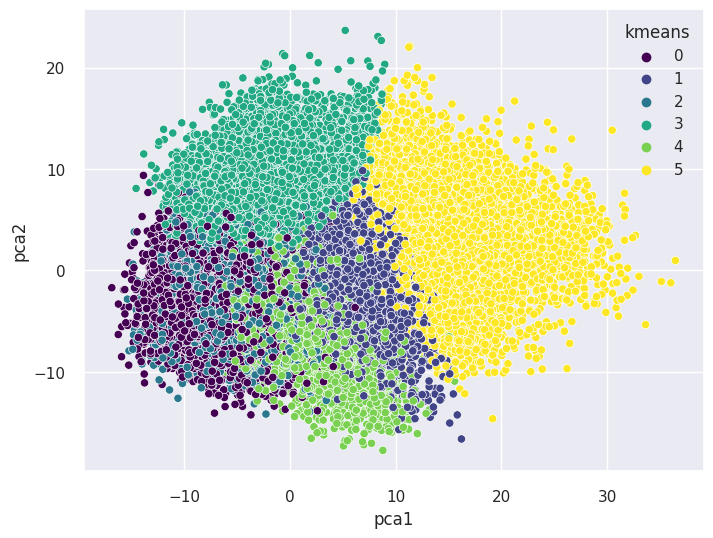

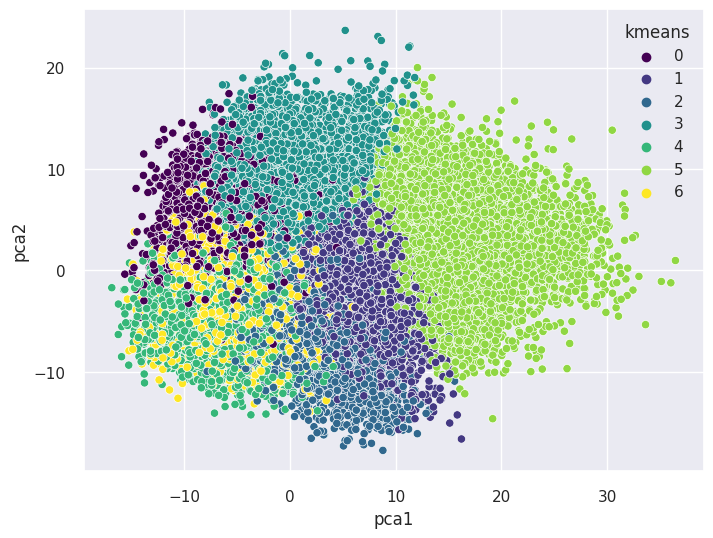

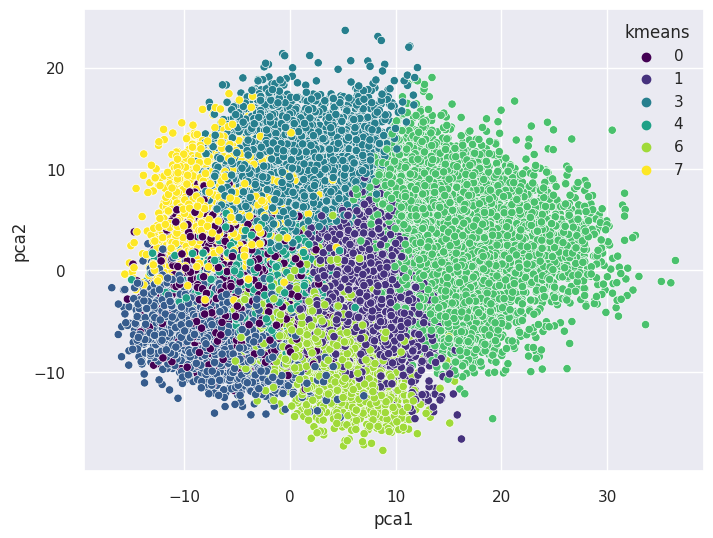

In [71]:
elbow = 7

for n_clusters in [elbow-1, elbow, elbow+1]:
    kmeans = KMeans(n_init="auto", n_clusters=n_clusters)
    labels = kmeans.fit_predict(tabular_playground_series)

    decomposer = PCA(n_components=2)
    data_pca = decomposer.fit_transform(tabular_playground_series)
    data_pca = pd.DataFrame(data_pca, columns=[f"pca{i}" for i in [1, 2]])
    data_pca["kmeans"] = labels

    sns.scatterplot(x="pca1", y="pca2", hue="kmeans",  data=data_pca, palette='viridis')
    plt.show()

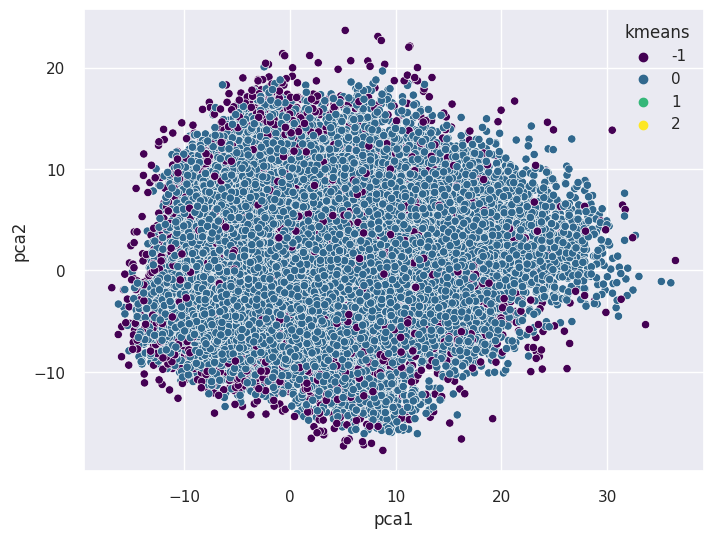

In [72]:
from sklearn.cluster import DBSCAN

for eps in [6.9]:
    for min_samples in [5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(tabular_playground_series)
        labels = dbscan.labels_

        decomposer = PCA(n_components=2)
        data_pca = decomposer.fit_transform(tabular_playground_series)
        data_pca = pd.DataFrame(data_pca, columns=[f"pca{i}" for i in [1, 2]])
        data_pca["kmeans"] = labels

        sns.scatterplot(x="pca1", y="pca2", hue="kmeans",  data=data_pca, palette='viridis')
        plt.show()

# TASK 8
8. Based on the visualizations, choose a clustering method, which seems the best. Justify your choice.

Based on the visuals, clustering with Kmeans seems like the most reasonable approach. The points are clearly separated on the pca visualization. Another visualization with tsne was also used, but the algorithm took too long to execute, so we did not include it in the final report as it only confirmed our previous findings.